# (v) Four random functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
import math

In [ ]:
x = np.linspace(-10,10,500)
mu = np.zeros(500)
sigma = np.identity(500)

np.random.seed(0)
v = np.random.multivariate_normal(mu, sigma, 4)

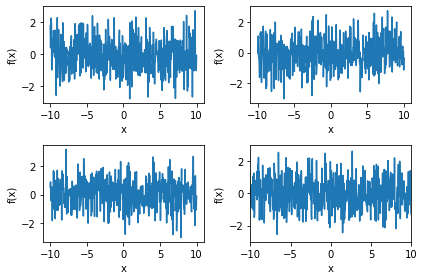

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(4):
    axes.ravel()[i].plot(x, v[i])
    axes.ravel()[i].set_xlabel("x")
    axes.ravel()[i].set_ylabel("f(x)")
    plt.xlim(-10, 10)
    plt.ylim(-3, 3)
plt.tight_layout()

In [ ]:
# If the covariance matrix is a all-ones matrix
x = np.linspace(-10,10,500)
mu = np.zeros(500)
sigma = np.ones([500, 500])

np.random.seed(0)
v = np.random.multivariate_normal(mu, sigma, 4)

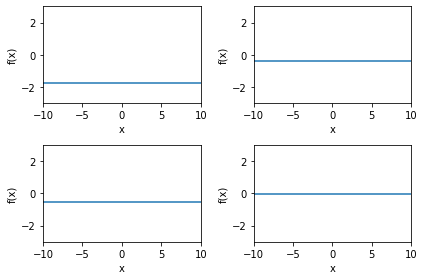

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for i in range(4):
    plt.sca(axes.ravel()[i])
    plt.plot(x, v[i])
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-10, 10)
    plt.ylim(-3, 3)
plt.tight_layout()

# (vi) Gaussian kernels

In [ ]:
x = np.linspace(-10,10,500)
muK = np.zeros(500)
sigmaK = np.zeros([500, 500])
h = 5

for i in range(500):
    for j in range(500):
        sigmaK[i, j] = math.exp(-(x[i]-x[j])**2/h)

np.random.seed(0)
yK = np.random.multivariate_normal(muK, sigmaK, 4)

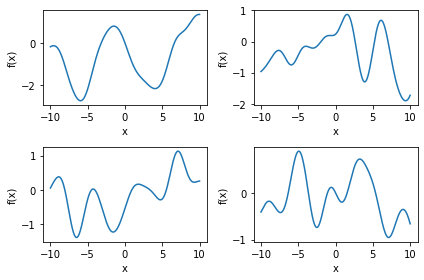

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(4):
    plt.sca(axes.ravel()[i])
    axes.ravel()[i].plot(x, yK[i])
    axes.ravel()[i].set_xlabel("x")
    axes.ravel()[i].set_ylabel("f(x)")
plt.tight_layout()

# (vii) Periodic functions

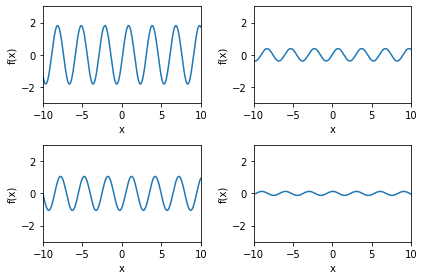

In [ ]:
N = 500
x = np.linspace(-10,10,N)
muP = np.zeros(N)
sigmaP = np.zeros([N, N])
h = 3  #0.15*np.pi

for i in range(N):
    for j in range(N):
        sigmaP[i, j] = np.cos(2*np.pi*(x[i]-x[j])/h)

np.random.seed(0)
yP = np.random.multivariate_normal(muP, sigmaP, 4)

fig, axes = plt.subplots(nrows=2, ncols=2)
# for i, ax in enumerate(axes.ravel()):
for i in range(4):
    plt.sca(axes.ravel()[i])
    plt.plot(x, yP[i])
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-10, 10)
    plt.ylim(-3, 3)
plt.tight_layout()

In [ ]:
# Check if the period is 3 units
for i in range(yP.shape[0]):
    print(yP[i, 250], yP[i, 325])

In [ ]:
# plt.imshow(sigmaP)

In [ ]:
# eigvals, eigvecs = np.linalg.eig(sigmaP)
# plt.plot(eigvals, '.-')

# (ix) Four functions from the posterior

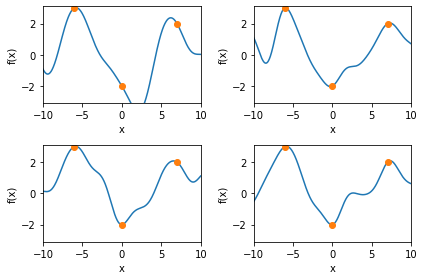

In [ ]:
N = 500 #number of elements in x (test data), which is n in the question
h = 5
x = np.linspace(-10,10,N)
x_bar = np.array([-6, 0, 7]) #training data
y_bar = np.array([3, -2, 2])
k_x_x = np.zeros([N, N]) #kernel
k_xbar_x = np.zeros([len(x_bar), N])
k_xbar_xbar = np.zeros([len(x_bar), len(x_bar)])

mu_n = np.zeros(N)
mu_m = np.zeros(len(y_bar))

for i in range(N):
    for j in range(N):
        k_x_x[i, j] = np.exp(-(x[i]-x[j])**2/h)

for i in range(len(x_bar)):
    for j in range(N):
        k_xbar_x[i, j] = np.exp(-(x_bar[i]-x[j])**2/h)

for i in range(len(x_bar)):
    for j in range(len(x_bar)):
        k_xbar_xbar[i, j] = np.exp(-(x_bar[i]-x_bar[j])**2/h)

mu_post = mu_n + (k_xbar_x.T.dot(np.linalg.inv(k_xbar_xbar)).dot(y_bar-mu_m))
                                 
sigma_post = k_x_x - (k_xbar_x.T.dot(np.linalg.inv(k_xbar_xbar)).dot(k_xbar_x))

np.random.seed(0)
y_post = np.random.multivariate_normal(mu_post, sigma_post, 4)

fig, axes = plt.subplots(nrows=2, ncols=2)
# for i, ax in enumerate(axes.ravel()):
for i in range(4):
    # plt.fill_between(x, mu_post-2*np.diag(sigma_post), mu_post+2*np.diag(sigma_post), color='bisque')
    plt.sca(axes.ravel()[i])
    plt.plot(x, y_post[i])
    plt.plot(x_bar, y_bar, "o")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-10, 10)
    plt.ylim(-3.1, 3.1)
plt.tight_layout()

# (xii) mean function for part (ix)

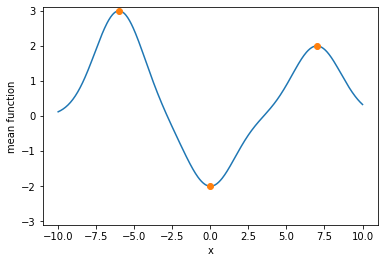

In [ ]:
plt.plot(x, mu_post)
plt.xlabel("x")
plt.ylabel("mean function")
plt.ylim(-3.1, 3.1)
plt.plot(x_bar, y_bar, "o")

# (x) Periodic kernels

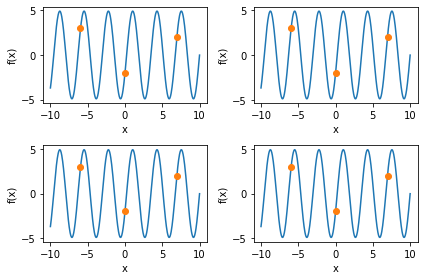

In [ ]:
x_bar = np.array([-6, 0, 7]) #training data
y_bar = np.array([3, -2, 2])

n = 500 #number of elements in x (test data), which is n in the question
m = len(y_bar)

h = 5
p = 3.26 #to define periodic function: period = p units

x = np.linspace(-10,10,N)
k_x_x = np.zeros([N, N]) #kernel
k_xbar_x = np.zeros([len(x_bar), N])
k_xbar_xbar = np.zeros([len(x_bar), len(x_bar)])

mu_n = np.zeros(n)
mu_m = np.zeros(m)

for i in range(n):
    for j in range(n):
        k_x_x[i, j] = np.cos(2*np.pi*(x[i]-x[j])/p)

for i in range(m):
    for j in range(n):
        k_xbar_x[i, j] = np.cos(2*np.pi*(x_bar[i]-x[j])/p)

for i in range(m):
    for j in range(m):
        k_xbar_xbar[i, j] = np.cos(2*np.pi*(x_bar[i]-x_bar[j])/p)
k_xbar_xbar += 1e-6*np.identity(m) #add a regularization term

mu_post = mu_n + (k_xbar_x.T.dot(np.linalg.inv(k_xbar_xbar)).dot(y_bar-mu_m))
                                 
sigma_post = k_x_x - (k_xbar_x.T.dot(np.linalg.inv(k_xbar_xbar)).dot(k_xbar_x))

# sigma_post = (sigma_post+sigma_post.T)/2   # enforce symmetry (not used eventually, commented out)
# sigma_post += 1e-6*np.eye(N)    # regularize sigma_post (not used eventually, commented out)

np.random.seed(0)
y_post = np.random.multivariate_normal(mu_post, sigma_post, 4)

fig, axes = plt.subplots(nrows=2, ncols=2)
# for i, ax in enumerate(axes.ravel()):
for i in range(4):
    # plt.fill_between(x, mu_post-2*np.diag(sigma_post), mu_post+2*np.diag(sigma_post), color='bisque')
    plt.sca(axes.ravel()[i])
    plt.plot(x, y_post[i])
    plt.plot(x_bar, y_bar, "o")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    # plt.xlim(-10, 10)
    # plt.ylim(-3.1, 3.1)
plt.tight_layout()

In [ ]:
# eigvals, eigvecs = np.linalg.eig((sigma_post+sigma_post.T)/2 + 1e-9*np.eye(*sigma_post.shape))

In [ ]:
# plt.plot(eigvals, '.-')
# eigvals

In [ ]:
k_xbar_xbar

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# (xii) Mean function for part (x)

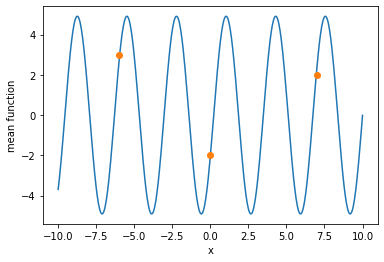

In [ ]:
plt.plot(x, mu_post)
plt.xlabel("x")
plt.ylabel("mean function")

plt.plot(x_bar, y_bar, "o")